#  ***ZeroR Classifier***
*ZeroR is the simplest classification method which 
relies on the target and ignores all predictors. ZeroR classifier simply predicts the majority category (class). Although there is no predictability power in ZeroR, it is useful for determining a baseline performance as a benchmark for other classification methods.*


In [12]:
# importing libraries
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# to read & handle files
import pandas as pd

In [ ]:
# reads the csv file containg the data
df = pd.read_csv('/content/Weather Dataset.csv')
print('Data: \n{}'.format(df))
print('Shape {}\n'.format(df.shape))

# prints first five instances of the dataframe
print('First Five Instances: \n{}'.format(df.head()))
# prints statistical description of the dataframe
print('Dataframe Description: \n{}'.format(df.describe()))

Data: 
     outlook  temperature  humidity  windy play
0      sunny           85        85  False   no
1      sunny           80        90   True   no
2   overcast           83        86  False  yes
3      rainy           70        96  False  yes
4      rainy           68        80  False  yes
5      rainy           65        70   True   no
6   overcast           64        65   True  yes
7      sunny           72        95  False   no
8      sunny           69        70  False  yes
9      rainy           75        80  False  yes
10     sunny           75        70   True  yes
11  overcast           72        90   True  yes
12  overcast           81        75  False  yes
13     rainy           71        91   True   no
Shape (14, 5)

First Five Instances: 
    outlook  temperature  humidity  windy play
0     sunny           85        85  False   no
1     sunny           80        90   True   no
2  overcast           83        86  False  yes
3     rainy           70        96  False  yes


In [ ]:
# dropping play column to separte the features
features = df.drop(columns = ['play'])
print('Attributes: \n{}\n'.format(features))

# set play as the target class
target = df['play']
print('Target Class: \n{}'.format(target))

Attributes: 
     outlook  temperature  humidity  windy
0      sunny           85        85  False
1      sunny           80        90   True
2   overcast           83        86  False
3      rainy           70        96  False
4      rainy           68        80  False
5      rainy           65        70   True
6   overcast           64        65   True
7      sunny           72        95  False
8      sunny           69        70  False
9      rainy           75        80  False
10     sunny           75        70   True
11  overcast           72        90   True
12  overcast           81        75  False
13     rainy           71        91   True

Target Class: 
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object


In [ ]:
# using ZeroR classifier
# most_frequent: the predict method always returns the most frequent class label in the observed y argument passed to fit. 
model = DummyClassifier(strategy = 'most_frequent', random_state = 0)

# fit() is used to train the model
model.fit(features, target)
# dataset is trained and a model is created

DummyClassifier(random_state=0, strategy='most_frequent')

In [ ]:
# predictions of the model
predictions = model.predict(features)
print('Predictions made by the ZeroR classifier')
print(predictions)

# accuracy of the prediction by the model
score = accuracy_score(target, predictions)
print('Accuracy score of the model: ')
print(score)

# confusion matrix
print(confusion_matrix(target, predictions))

Predictions made by the ZeroR classifier
['yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes' 'yes'
 'yes' 'yes']
Accuracy score of the model: 
0.6428571428571429
[[0 5]
 [0 9]]


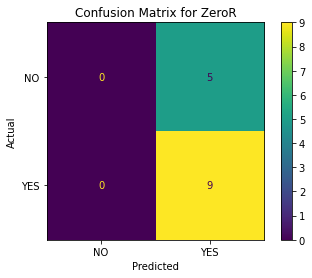

In [13]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(target, predictions)
# creating confusion matrix display object - alphabetical sorting order
conf_matrix_dis_object = ConfusionMatrixDisplay(conf_matrix, display_labels=['NO', 'YES'])
conf_matrix_dis_object.plot()

# using axes attribute 'ax_' to get the underlying axes
conf_matrix_dis_object.ax_.set(
    title = 'Confusion Matrix for ZeroR',
    xlabel = 'Predicted',
    ylabel = 'Actual'
)
plt.show()